Arede de lojas Bruno tem 19 lojas em algumas das principais cidades do país. A empresa pensa em construir 3 centros logísticos para abastecer as lojas. Mas, qual seria a posição ótima para cada um desses três hubs, considerando apenas a posição (coordenadas geográficas) das lojas?

In [1]:
import numpy as np #para manipular os vetores
from matplotlib import pyplot as plt #para plotar os gráficos
from sklearn.cluster import KMeans #para usar o KMeans

In [5]:
#matriz com as coordenadas geográficas de cada loja

dataset = np.array(
[[-25, -46], #são paulo
[-22, -43], #rio de janeiro
[-25, -49], #curitiba
[-30, -51], #porto alegre
[-19, -43], #belo horizonte
[-15, -47], #brasilia
[-12, -38], #salvador
[-8, -34], #recife
[-16, -49], #goiania
[-3, -60], #manaus
[-22, -47], #campinas
[-3, -38], #fortaleza
[-21, -47], #ribeirão preto
[-23, -51], #maringa
[-27, -48], #florianópolis
[-21, -43], #juiz de fora
[-1, -48], #belém
[-10, -67], #rio branco
[-8, -63]]) #porto velho

In [19]:
dataset.shape[0]

19

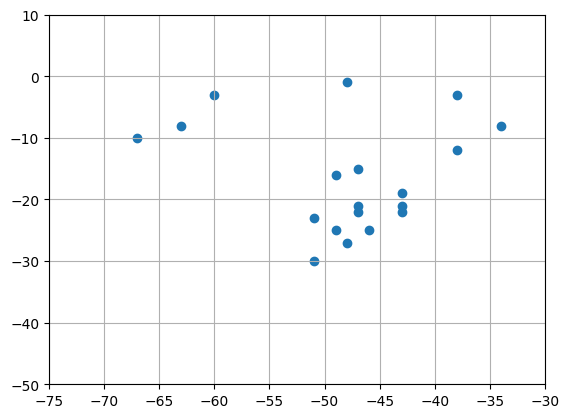

In [6]:
plt.scatter(dataset[:,1], dataset[:,0]) #posicionamento dos eixos x e y
plt.xlim(-75, -30) #range do eixo x
plt.ylim(-50, 10) #range do eixo y
plt.grid() #função que desenha a grade no nosso gráfico

K-means++ is a smart centroid initialization method. The goal is to spread out the initial centroid by assigning the first centroid randomly then selecting the rest of the centroids based on the maximum squared distance. The idea is to push the centroids as far as possible from one another.
In K-means the initial placement of centroid plays a very important role in it's convergence. Sometimes, the initial centroids are placed in a such a way that during consecutive iterations of K-means the clusters the clusters keep on changing drastically and even before the convergence condition may occur, max_iter is reached and we are left with incorrect cluster. Hence, the clusters obtained in such may not be correct. To overcome this problem, this parameter is introduced. The value of n_init basically determines how many different sets of randomly chosen centroids, should the algorithm use. For each different set of points, a comparision is made about how much distance did the clusters move, i.e. if the clusters travelled small distances than it is highly likely that we are closest to ground truth/best solution. The points which provide the best performance and their respective run along with all the cluster labels are returned.

In [10]:
# configurando o modelo

kmeans = KMeans(n_clusters=3, #numero de clusters (quantidade de centros logísticos)
                init='k-means++', # K-means++ is a smart centroid initialization method.
                n_init=10, # states how many different sets of random points the algorithm should use. It then gives the best run in terms of inertia (how little the algo was moving at the end of the run -small steps --> closer to best solution)
                max_iter=300 #numero máximo de iterações até encontrar as posições ótimas para os centroides
)

In [11]:
# passando os dados para o modelo
pred_y = kmeans.fit_predict(dataset)

In [13]:
# em qual agrupamento cada ponto foi adicionado
pred_y

array([0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 1],
      dtype=int32)

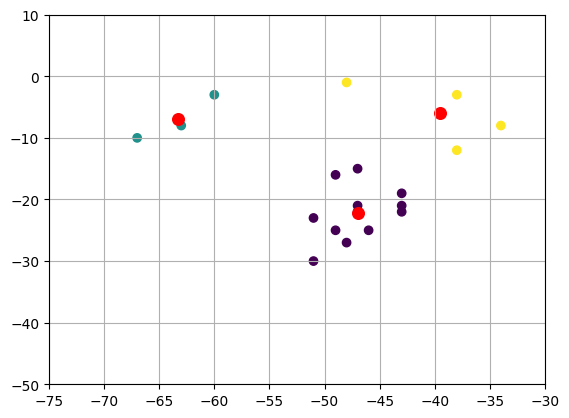

In [12]:
plt.scatter(dataset[:,1], dataset[:,0], c=pred_y) # posicionamento dos eixos x e y e array de cores (c)
plt.xlim(-75, -30) # range do eixo x
plt.ylim(-50, 10) # range do eixo y
plt.grid() # função que desenha a grade no nosso gráfico
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0], s = 70, c = 'red') # posição de cada centroide no gráfico em vermelho
plt.show()

# Como calcular a distância entre os dados? distância euclidiana

In [14]:
from scipy.spatial.distance import cdist

In [20]:
dataset

array([[-25, -46],
       [-22, -43],
       [-25, -49],
       [-30, -51],
       [-19, -43],
       [-15, -47],
       [-12, -38],
       [ -8, -34],
       [-16, -49],
       [ -3, -60],
       [-22, -47],
       [ -3, -38],
       [-21, -47],
       [-23, -51],
       [-27, -48],
       [-21, -43],
       [ -1, -48],
       [-10, -67],
       [ -8, -63]])

In [21]:
kmeans.cluster_centers_

array([[-22.16666667, -47.        ],
       [ -7.        , -63.33333333],
       [ -6.        , -39.5       ]])

In [18]:
# calcula a distancia euclidiana de cada ponto a cada centroide
cdist(dataset, kmeans.cluster_centers_, 'euclidean')

array([[ 3.00462606, 24.98888642, 20.08108563],
       [ 4.00347072, 25.26745821, 16.37833935],
       [ 3.46810867, 23.00965981, 21.24264579],
       [ 8.79551653, 26.09810551, 26.61296676],
       [ 5.10174262, 23.61026142, 13.46291202],
       [ 7.16666667, 18.18729715, 11.71537451],
       [13.57796417, 25.82204054,  6.18465844],
       [19.22743988, 29.35037384,  5.85234996],
       [ 6.48288345, 16.9246697 , 13.79311422],
       [23.1594713 ,  5.20683312, 20.71834936],
       [ 0.16666667, 22.17606317, 17.67059705],
       [21.17453922, 25.64717875,  3.35410197],
       [ 1.16666667, 21.5122704 , 16.77050983],
       [ 4.08588356, 20.2017601 , 20.52437575],
       [ 4.93569763, 25.2014109 , 22.65502152],
       [ 4.16666667, 24.68692862, 15.4029218 ],
       [21.19027555, 16.46545205,  9.86154146],
       [23.40999312,  4.7375568 , 27.78938646],
       [21.37041049,  1.05409255, 23.58495283]])

In [22]:
# Menor distância ao centroide para cada ponto
np.min(cdist(dataset, kmeans.cluster_centers_, 'euclidean'), axis=1)

array([3.00462606, 4.00347072, 3.46810867, 8.79551653, 5.10174262,
       7.16666667, 6.18465844, 5.85234996, 6.48288345, 5.20683312,
       0.16666667, 3.35410197, 1.16666667, 4.08588356, 4.93569763,
       4.16666667, 9.86154146, 4.7375568 , 1.05409255])

In [28]:
# Inertia: soma dos quadrados das distâncias dos pontos ao respectivo centroide (WCSS)
np.sum(np.power(np.min(cdist(dataset, kmeans.cluster_centers_, 'euclidean'), axis=1), 2))

525.3333333333333

In [24]:
# O KMeans do scikit-learn já calcula o wcss pra gente e dá o nome de inertia
kmeans.inertia_

525.3333333333334

In [30]:
# distorção: é a inertia / total de pontos
np.sum(np.power(np.min(cdist(dataset, kmeans.cluster_centers_, 'euclidean'), axis=1), 2)) / dataset.shape[0]

27.64912280701754

# Como escolher o número de clusters? Método elbow!

In this method to determine the k-value we continuously iterate for k=1 to k=n.
For every value of k, we calculate the WCSS that is the sum of the squared distance between each point and the centroid in a cluster.
Now for determining the best number of clusters(k) we plot a graph of k versus their WCSS value.
When k=1 the WCSS has the highest value but with increasing k value WCSS value starts to decrease. We choose that value of k from where the graph starts to look like a straight line.


Distortion: It is calculated as the average of the squared distances from the cluster centers of the respective clusters to each data point. Typically, the Euclidean distance metric is used.

 **Distortion = 1/n * Σ(distance(point, centroid)^2)**

Inertia: It is the sum of the squared distances of samples to their closest cluster center.

**Inertia = Σ(distance(point, centroid)^2)**

In [31]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dataset)

    distortions.append(sum(np.min(cdist(dataset, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / dataset.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(dataset, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / dataset.shape[0]
    mapping2[k] = kmeanModel.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [32]:
# distortions
for key, val in mapping1.items():
	print(f'{key} : {val}')

1 : 10.373605214102142
2 : 7.156941762755952
3 : 4.673459484506712
4 : 3.8805097257533516
5 : 3.1869306480430546
6 : 2.6321802194174824
7 : 2.2886882974782745
8 : 1.9509096082305926
9 : 1.6671684971384915


In [33]:
# inertias
for key, val in mapping2.items():
	print(f'{key} : {val}')

1 : 2628.421052631579
2 : 1359.8666666666666
3 : 525.3333333333334
4 : 365.0952380952381
5 : 235.42857142857144
6 : 175.70000000000002
7 : 135.03333333333336
8 : 99.7
9 : 70.96666666666667


To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia starts decreasing in a linear fashion.

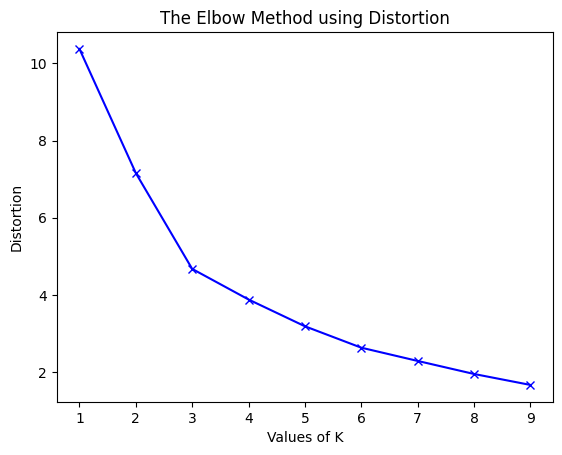

In [34]:
# plot the graph of k versus distortions

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

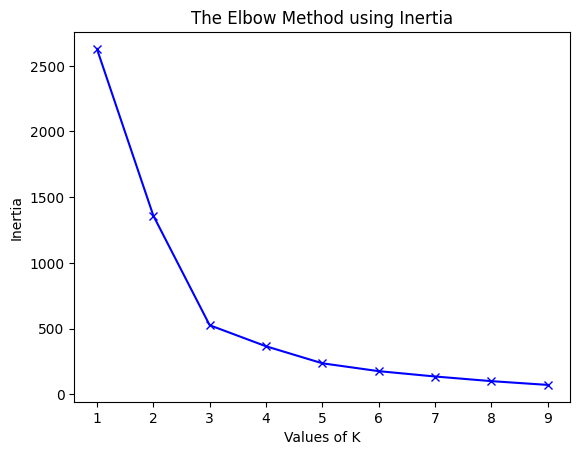

In [35]:
# plot the graph of k versus inertias

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()